In [1]:
from util.VisualizeDataset import VisualizeDataset
from Chapter3.DataTransformation import LowPassFilter
from Chapter3.DataTransformation import PrincipalComponentAnalysis
from Chapter3.ImputationMissingValues import ImputationMissingValues
from Chapter3.KalmanFilters import KalmanFilters
import os
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,10]

In [2]:
rawdatapth = "data/result-given/"
outputpth = "data/intermediate/"

if not os.path.exists(outputpth):
    print("Empty path, so creating..." + outputpth + "...done!")
    os.makedirs(outputpth)

In [3]:
dataset = pd.read_csv(rawdatapth + "chapter3_result_outliers.csv", index_col=0)
dataset.index = pd.to_datetime(dataset.index)
dataset

,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,...,labelEating,labelRunning,light_phone_lux,mag_phone_x,mag_phone_y,mag_phone_z,mag_watch_x,mag_watch_y,mag_watch_z,press_phone_pressure
2016-02-08 18:28:25.656222,-0.090431,0.164098,9.631765,9.550844,0.197689,1.513422,-0.008824,0.018529,-0.001647,0.001667,...,0,0,NaN,-73.134000,-138.000000,-29.022000,-6.681818,59.000000,-23.318182,1029.0410
2016-02-08 18:28:25.906222,-0.097600,0.167640,9.631740,9.552667,0.189271,1.511000,-0.008800,0.018540,-0.001540,0.002333,...,0,0,1084.0,-73.877500,-139.552500,-28.970000,-6.375000,59.000000,-23.708333,1029.1320
2016-02-08 18:28:26.156222,-0.089120,0.167520,9.637300,9.549745,0.194588,1.517431,-0.008880,0.018340,-0.002420,0.001824,...,0,0,1084.0,-76.401600,-141.259200,-28.555200,-6.038462,58.076923,-25.538462,1029.2820
2016-02-08 18:28:26.406222,-0.090135,0.166019,9.632538,9.552022,0.200000,1.498267,-0.008962,0.018288,-0.002038,0.001956,...,0,0,1086.0,-76.804615,-141.133846,-28.954615,-5.958333,58.291667,-24.125000,1029.3690
2016-02-08 18:28:26.656222,-0.090608,0.167686,9.630078,9.550375,0.200771,1.504312,-0.008760,0.018800,-0.002260,0.001896,...,0,0,1084.0,-76.740000,-141.314400,-28.795200,-6.260870,59.260870,-23.478261,1029.2680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:41:03.906222,-0.163020,0.184061,9.609571,NaN,NaN,NaN,-0.008592,0.021347,0.002082,NaN,...,0,0,NaN,-69.600000,27.660000,-10.533333,NaN,NaN,NaN,NaN
2016-02-08 20:41:04.156222,-0.162686,0.185196,9.611863,NaN,NaN,NaN,-0.008745,0.021294,0.002000,NaN,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1011.0085
2016-02-08 20:41:04.406222,-0.159980,0.186800,9.615020,NaN,NaN,NaN,-0.008480,0.020960,0.002200,NaN,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1011.0760
2016-02-08 20:41:04.656222,-0.158882,0.184333,9.613510,NaN,NaN,NaN,-0.008529,0.020882,0.002314,NaN,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1010.8450


In [5]:
DataViz = VisualizeDataset()
MisVal = ImputationMissingValues()
col = "hr_watch_rate"

In [6]:
meandataset = MisVal.impute_mean(copy.deepcopy(dataset), col)
meddataset = MisVal.impute_median(copy.deepcopy(dataset), col)
interpodataset = MisVal.impute_interpolate(copy.deepcopy(dataset), col)

Figure saved to figures/figure_1.png


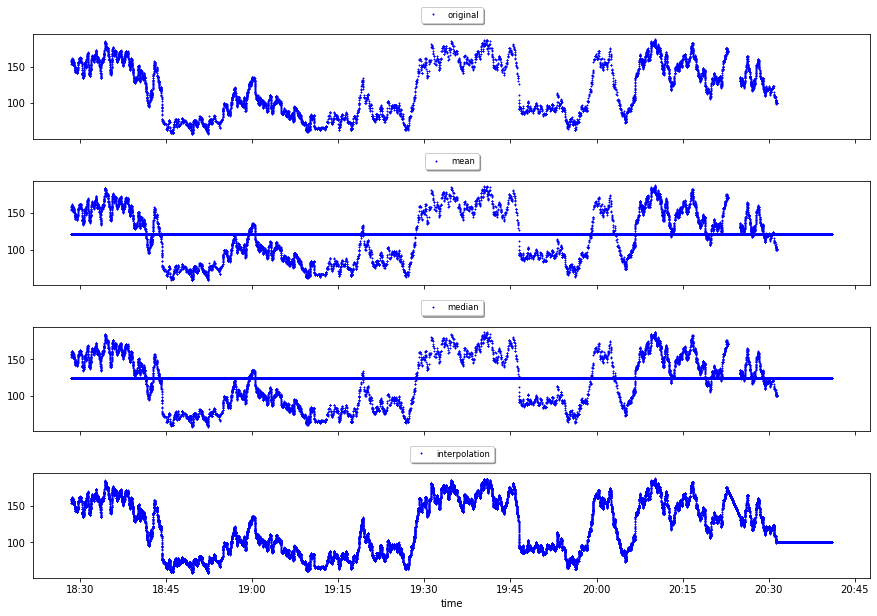

In [7]:
DataViz.plot_imputed_values(dataset, ["original", "mean", "median", "interpolation"], "hr_watch_rate",
                                    meandataset["hr_watch_rate"], 
                                    meddataset["hr_watch_rate"],
                                    interpodataset["hr_watch_rate"])